In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Aircraft Propulsion Code
# Data Given
Mcruise = 0.7 #Mach N
height = 35000 #ft
# Fan values
FanPr = 1.45
Fann = 0.94
# LPC
LPCPr = 1.45
BoosterPr = LPCPr*FanPr
LPCn = 0.92
#HPC
HPCPr = 27.9
HPCn = 0.92
#HPT 
HPTn = 0.92
#LPT 
LPTn = 0.94
# Tail Cone fan
TailConePr = 1.25
TailConen = 0.96
# Combustion Stage
T04 = 1540 # K
loss = 0.05 # Pressure lost
# Air Properties
cpAir = 1005 #JKg-1K-1
gammaAir = 1.4
# Combusion Products
cpComb = 1100 #JKg-1K-1
gammaComb = 1.3
# Number of Fan Generators 
nfg = 2
# Overall Bypass Ratio
BypassRatio = 14.4
# Fan Gen Bypass Ratio
FanGenBypass = 6.4
# R1
R1 = 0.35 #m
# R2
R2 = 1 #m
# Boundary layer thickness
h = 1 #m

#General Information
# At 35000 feet
Tatm = 218.8 #k
Patm = 23.8 #Kpa
rhoAir = 0.38 #kg/m3
Rair = 287 #j/kgk^-1

In [197]:
#4.1
# Find Velocity Vinf
vinf = Mcruise * np.sqrt(gammaAir*Rair*Tatm)
print(f'Flight velocity is: {vinf} m/s^2\n')

#Fan Inlet T02, P013
T02 = Tatm*(1+0.5*(gammaAir-1)*Mcruise**2)
P02 = Patm*((T02/Tatm)**(gammaAir/(gammaAir-1)))
print(f'T02 is: {T02} K')
print(f'P02 is: {P02} KPa\n')

#Fan Outlet T013, P013
T013 = T02 + (T02/Fann)*((FanPr)**((gammaAir-1)/gammaAir)-1)
P013 = P02 * FanPr
print(f'T013 is: {T013} K')
print(f'P013 is: {P013} KPa\n')

#LPC T023, P023
T023s = (BoosterPr**((gammaAir-1)/gammaAir))*T02
T023 = ((T023s - T013)/LPCn) + T013
P023 = P02*BoosterPr
print(f'T023 is: {T023} K')
print(f'P023 is: {P023} KPa\n')

#HPC T03, P03
T03s = (HPCPr**((gammaAir-1)/gammaAir))*T023
T03 = ((T03s - T023)/HPCn) + T023
P03 = P023*HPCPr
print(f'T03 is: {T03} K')
print(f'P03 is: {P03} KPa\n')

#HPT T045, P045
T045 = T04 - (cpAir/cpComb)*(T03 - T023)
T045s = T04 - ((T04 - T045)/HPTn)
P04 = P03*0.95
P045 = P04*((T045s/T04)**(gammaComb/(gammaComb-1)))
print(f'T045 is: {T045} K')
print(f'P045 is: {P045} KPa\n')

#Velocity at the Bypass -> Vjb
Vjb = np.sqrt(2*cpAir*T013*(1-((Patm/P013)**((gammaAir-1)/gammaAir))))
print(f'Vjb is: {Vjb} m/s^2')

Flight velocity is: 207.5518768886468 m/s^2

T02 is: 240.24239999999998 K
P02 is: 33.01301182514138 KPa

T013 is: 268.86725951231483 K
P013 is: 47.868867146455 KPa

T023 is: 299.5232661692171 K
P023 is: 69.40985736235976 KPa

T03 is: 816.6535555091601 K
P03 is: 1936.5350204098372 KPa

T045 is: 1067.5309629212338 K
P045 is: 317.16377636887336 KPa

Vjb is: 312.74241491669216 m/s^2


In [209]:
#4.2
# Calculating VBLI with the given formula
VBLI = vinf * (h**(-1/7))*(((7/16)*((R2-R1)**(16/7)))+(7/9)*R1*((R2-R1)**(9/7)))/(((7/15)*((R2-R1)**(15/7)))+(7/8)*R1*((R2-R1)**(8/7)))
print(f'VBLI is {VBLI} m/s^2\n')

# Calculating the Area
Area = np.pi*((R2)**2) - np.pi*((R1)**2)
print(f'Area is {Area} m^2\n')

# Inlet Static State TBLI, TBLI
T02BLI = T02
ndMach = VBLI/(np.sqrt(cpAir*T02BLI))

Minter = [0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63]
Tinter = [0.9390, 0.9370, 0.9349, 0.9328, 0.9307, 0.9286, 0.9265]
Pinter = [0.8022, 0.7962, 0.7901, 0.7840, 0.7778, 0.7716, 0.7654]
rhoInter = [0.8544, 0.8498, 0.8451, 0.8405, 0.08357, 0.8310, 0.8262]
ndInter = [0.3493, 0.3551, 0.3608, 0.3665, 0.3772, 0.3779, 0.3835]

MBLI = np.interp(ndMach, ndInter, Minter) #Your value, your formula, value you're trying to find
TBLI = ((VBLI**2)/((MBLI**2)*gammaAir*Rair))
print(f'TBLI is: {TBLI} K')

# TBLIratio = np.interp(ndMach, ndInter, Tinter)
# print(f'fff {TBLIratio}')

# Pressure BLI - PBLI
PBLIratio = np.interp(ndMach, ndInter, Pinter)
# PBLI = P02*PBLIratio
PBLI = Patm
print(f'PBLI is: {PBLI} KPa \n')

# rhoBLI
# rhoBLI = (Rair*TBLI)/(PBLI*(10**5))
rhoBLI = ((PBLI)/(Rair*TBLI))*1e3
print(f'rhoBLI is: {rhoBLI} kg/m^2')

# mass flow
mTCF = Area*rhoBLI*VBLI
print(f'mTCF is: {mTCF} Kg/s\n')

# Inlet stagnation state
T02TCF = TBLI*(1+0.5*(gammaAir-1)*MBLI**2)

# T02TCF = T02BLI
P02BLI = PBLI*((1+0.5*(gammaAir-1)*(MBLI**2))**(gammaAir/(gammaAir-1)))
P02TCF = P02BLI
print(f'T02TCF is: {T02TCF} K')
print(f'P02TCF is: {P02TCF} KPa\n')

# Tail cone Fan outlet
T013TCF = T02TCF + (T02TCF/TailConen)*((TailConePr)**((gammaAir-1)/gammaAir)-1)
P013TCF = P02TCF * TailConePr
print(f'T013TCF is: {T013TCF} K')
print(f'P013TCF is: {P013TCF} KPa\n')

# Tail cone Fan jet velocity 
# ---- Velocity is too high, second formula makes more sense
VjTCF = np.sqrt(2*cpAir*T013TCF*(1-((Patm/P013TCF)**((gammaAir-1)/gammaAir))))
print(f'VjTCF is: {VjTCF} m/s^2')
# print(f'Inlet/Outlet ratio: {VBLI/VjTCF}')

# Net trust
# ---- Net trust might be too high due to high Tail cone Fan jet velocity
FnFan = (mTCF * (VjTCF - VBLI))*1e-3 # Flux of momentum leaving the engine - Flux of momentum entering engine (Page 17)
print(f'Net Trust is {FnFan} kN \n')

# Shaft Power
WxTCF = (mTCF*cpAir*(T013TCF-T02TCF))
print(f'Wx is: {WxTCF*1e-3} KW \n')

# Propulsive efficiency of the tail cone fan
nProp = (2*VBLI)/(VjTCF + VBLI)
print(f'Propulsive efficiency is: {nProp}')

VBLI is 178.20010348072125 m/s^2

Area is 2.7567475535250434 m^2

TBLI is: 224.54856304910945 K
PBLI is: 23.8 KPa 

rhoBLI is: 0.3693046534889486 kg/m^2
mTCF is: 181.42190789359483 Kg/s

T02TCF is: 240.3550721982084 K
P02TCF is: 30.197952407246447 KPa

T013TCF is: 256.8373106775483 K
P013TCF is: 37.74744050905806 KPa

VjTCF is: 252.46549345710878 m/s^2
Net Trust is 13.47336873997808 kN 

Wx is: 3005.1903470354655 KW 

Propulsive efficiency is: 0.8275567156874424


[0.6469822682593221, 0.7203657839943053, 0.7566119109099136, 0.7811919301543315, 0.7998647481347378, 0.8149313246472372, 0.8275567156874426, 0.838416559475626, 0.8479390857203638, 0.8564133606795421, 0.8640439247426612, 0.8709809104281085, 0.8773377990041213, 0.8832024601728833, 0.8886443176471, 0.893719168917746, 0.8984725259671804, 0.9029419909699957, 0.9071589836339503, 0.9111500217109283, 0.9149376866313808, 0.9185413628393964, 0.9219778116140571, 0.9252616219195731, 0.9284055685891043, 0.931420899776726, 0.9343175697849302, 0.9371044292531384, 0.9397893817340411, 0.942379513532257, 0.944881202094654, 0.9473002070608548, 0.9496417471935148, 0.9519105657321579, 0.9541109861958798, 0.956246960259036, 0.9583221090111117, 0.9603397586660557, 0.9623029715917416, 0.9642145733751672, 0.9660771765146979, 0.9678932012304075, 0.9696648938022675, 0.9713943427796496, 0.9730834933512734, 0.9747341601200084, 0.976348038489932, 0.9779267148423026, 0.9794716756514605, 0.980984315670177, 0.98246594

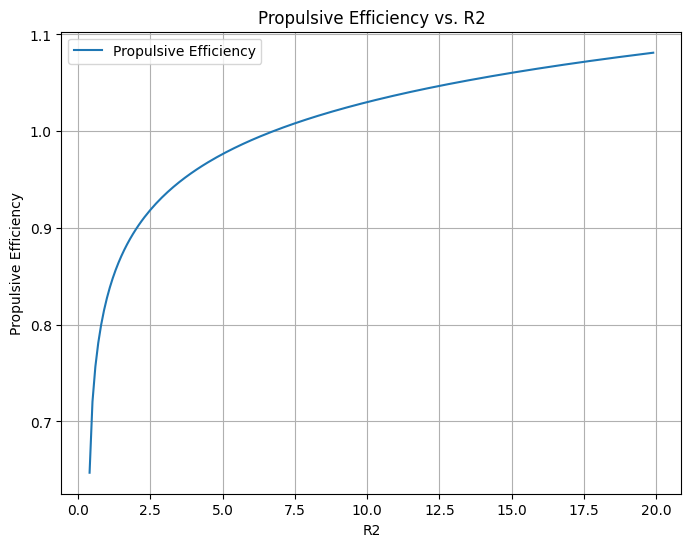

In [182]:
#4.3 - Creating a graph
# Define a range of values for "r"
r_values = np.arange(0.4, 20, 0.1)

# Calculate propulsive efficiency for each "r" value
prop_efficiency_values = []
for R2 in r_values:
    VBLI = vinf * (h**(-1/7))*(((7/16)*((R2-R1)**(16/7)))+(7/9)*R1*((R2-R1)**(9/7)))/(((7/15)*((R2-R1)**(15/7)))+(7/8)*R1*((R2-R1)**(8/7)))
    VjTCF = np.sqrt(2*cpAir*T013TCF*(1-((Patm/P013TCF)**((gammaAir-1)/gammaAir))))
    nProp = (2 * VBLI) / (VjTCF + VBLI)
    prop_efficiency_values.append(nProp)

print(prop_efficiency_values)
# Create the graph
plt.figure(figsize=(8, 6))
plt.plot(r_values, prop_efficiency_values,label="Propulsive Efficiency")
plt.xlabel("R2")
plt.ylabel("Propulsive Efficiency")
plt.title("Propulsive Efficiency vs. R2")
plt.grid(True)
plt.legend()
plt.show()

In [183]:
#4.4 - Commenting on the graph {200 words}

# The propulsive efficiency of a jet engine, particularly the tail cone fan in a turbofan engine, is influenced by the fan's outer radius (R2). This efficiency depends on several key factors.

# Inlet velocity and Outlet velocity ratio: Propulsive efficiency is equal to 100% when VjCFT and VBLI are equal, increasing the outer radius, R2 of the tail cone fan increases the Inlet/Outlet velocity ratio, this occurs at R2 = 10m, therefore, higher R2 leads to high efficiency which matches with the trend in the graph.

# Intake Area: Increasing R2 results in a larger intake area, allowing more air to be ingested into the engine, which can enhance overall engine performance and efficiency.

# Bigger increasing R2 reduce Fan Pressure Ratio which lead to increased bpr, increased bpr increase the gross thrust and improved sfc (page 51)

# Trade-offs: While a larger fan can boost efficiency, it may also introduce increased drag and weight, requiring careful engineering to strike the right balance.

# In conclusion, the propulsive efficiency of the tail cone fan and the entire engine is linked to the fan's outer radius due to its impact on these factors. Selecting an appropriate R2 involves optimizing these parameters for specific aircraft and operating conditions, seeking the right balance between performance and efficiency.

In [217]:
# 4.5
# Core mass flow in one fanGen
# nfg = 1
mCore = (mTCF/((BypassRatio-FanGenBypass)*nfg))
print(f'mCore is {mCore} kg/s \n')

# Bypass mass flow in one fanGen
mBypass = mCore*FanGenBypass
print(f'mBypass is {mBypass} kg/s \n')

# LPT power in one fanGen (kW)
# WxLPT = mBypass*cpAir*(T045-T05)
# WLPC = (mCore*cpAir*(T023-T02))
# WFan = (FanGenBypass*mCore*cpAir*(T013-T02))
# print(WLPC*1e-3, WFan*1e-3, (WxTCF/(2*0.9))*1e-3)
WxLPT = (mCore*cpAir*(T023-T02)) + (FanGenBypass*mCore*cpAir*(T013-T02)) + ((WxTCF/nfg)/0.9)
print(f'Power is {WxLPT*1e-3} KW \n')
#(Inlet - Outlet in the Low Pressure Turbine)

# LPT outlet -> T05, P05
T05 = T045 - WxLPT/((mCore*cpComb))
T05s = T045 - ((T045 - T05)/LPTn)
print(f'T05 is: {T05} K \n')
P05 = P045*((T05s/T045)**(gammaComb/(gammaComb-1)))
print(f'P05 is: {P05} KPa \n')

# Core jet velocity
P9 = Patm
Vjcore = np.sqrt(2*cpComb*T05*(1-(P9/P05)**((gammaComb-1)/gammaComb)))
print(f'Vjcore is: {Vjcore} m/s^2 \n')

# Overall net trust
FnBypass = ((mBypass * (Vjb - vinf))*1e-3)
FnCore = ((mCore * (Vjcore - vinf))*1e-3)
FnOverall = FnBypass + FnCore + FnFan
print(FnBypass, FnCore, FnFan)
print(f'FnOverall is: {FnOverall} KN \n')

mCore is 11.338869243349677 kg/s 

mBypass is 72.56876315743794 kg/s 

Power is 4432.746076489303 KW 

T05 is: 712.1366926496803 K 

P05 is: 47.69639145077003 KPa 

Vjcore is: 481.88403262967677 m/s^2 

7.633547240560692 3.1106164431937784 13.47336873997808
FnOverall is: 24.21753242373255 KN 

